## Clustering: Modeling: Introduction to K-Means

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Lesson Goals:
 - #### Cement a basic understanding of how K-Means operates
 - #### Observe an initial implementation of K-Means clustering
 - #### Learn how we can determine how many clusters to fit

---

> ### So What *is* K-Means Clustering?

---

### K-Means Clustering is the first unsupervised algorithm that we will implement.
- **Remember**, when we say unsupervised in relation to machine learning, we are describing a methodology that does *not* have a labeled target.  This doesn't mean that we won't leverage our clusters for a supervised methodology, but that this type of algorithm cannot map to a specific label, only convey how things are similar based on the paremeters of whatever algorithm we use.
- K-Means is a method of clustering that uses a pre-determined number of clusters 
- K stands for the number of clusters, similar to the way it means the number of neighbors in KNN

---

> ### So How does K-Means Clustering Work?

---

Step 1:  Randomly(ish) **choose k starting centers**

Step 2: Use distance calculations to **assign every point to the cluster of whatever centroid each point is closest to**
     
Step 3: **Reposition the centroids** by calculating the mean of each dimension of the collective points that have been assigned to each cluster.

Step 4+: **Iterate.** Now that we have moved centroids, re-assign your points and repeat the process, until the centers stop moving.

---
---

### Visual examples: 

K-means visuals (Slideshow): 
https://docs.google.com/presentation/d/1NtMLd4fp2pi_bDJiIg2O-5g48xJiXjtYFad42B6Pj6Q/edit?usp=sharing

Animation (Thanks Zach!): https://stats-demos.zach.wiki/static/kmeans_clustering.mp4

---

> #### Cool, let's check out how to use this in SKLearn!

---

In [2]:
from pydataset import data

# import data

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [4]:
# define independent variables for k-means

X = iris[['sepal_length', 'petal_length']]

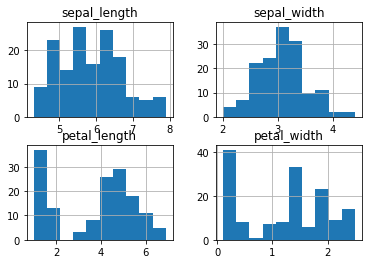

In [5]:
# look at distribution of sepal length and petal_length

iris.hist()
plt.show()

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   petal_length  150 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [7]:
# Scale the X

scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [8]:
# look at the head
X_scaled.head()

,sepal_length,petal_length
1,0.222222,0.067797
2,0.166667,0.067797
3,0.111111,0.050847
4,0.083333,0.084746
5,0.194444,0.067797


In [9]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state=321)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2], dtype=int32)

In [10]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [11]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
140,6.9,3.1,5.4,2.1,virginica,0
19,5.7,3.8,1.7,0.3,setosa,1
77,6.8,2.8,4.8,1.4,versicolor,0
36,5.0,3.2,1.2,0.2,setosa,1
76,6.6,3.0,4.4,1.4,versicolor,2
71,5.9,3.2,4.8,1.8,versicolor,2
150,5.9,3.0,5.1,1.8,virginica,2
35,4.9,3.1,1.5,0.2,setosa,1
63,6.0,2.2,4.0,1.0,versicolor,2
131,7.4,2.8,6.1,1.9,virginica,0


In [12]:
iris.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.873171,3.070732,5.619512,2.000000
1,5.005660,3.369811,1.560377,0.290566
2,5.882143,2.751786,4.475000,1.473214


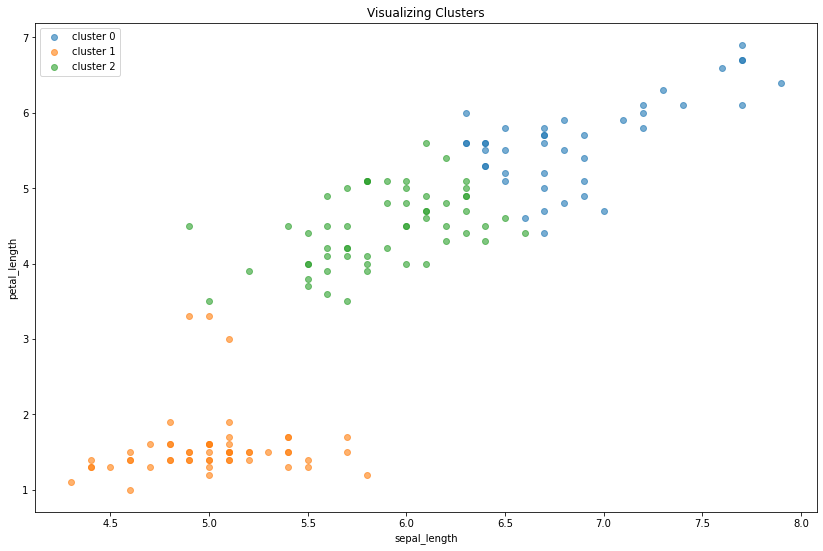

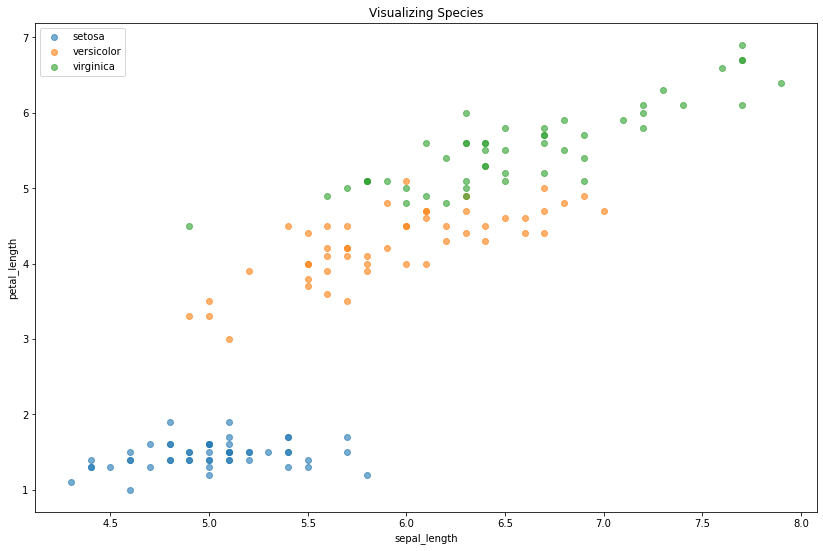

In [13]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in iris.groupby('species'):
    plt.scatter(subset.sepal_length, subset.petal_length, label=str(cluster), alpha=.6)
# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Species')
plt.show()

### Attributes for Kmeans : 

- cluster_centers_: The center point of each cluster (aka centroids).

- labels_: The labels for each observation.

- inertia_: Sum of squared distances of samples to their closest cluster center.

In [14]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[0.71476965, 0.78296817],
       [0.19601677, 0.09497921],
       [0.43948413, 0.58898305]])

In [15]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_length,petal_length
0,0.714770,0.782968
1,0.196017,0.094979
2,0.439484,0.588983


In [16]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_length', 'petal_length'].mean()
centroids

,sepal_length,petal_length
cluster,,
0,6.873171,5.619512
1,5.005660,1.560377
2,5.882143,4.475000


In [17]:
# Another way to get unscaled centroids?

pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_))

,0,1
0,6.873171,5.619512
1,5.005660,1.560377
2,5.882143,4.475000


In [18]:
# Labels (same as from predict)

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2], dtype=int32)

Text(0.5, 1.0, 'Visualizing Cluster Centers')

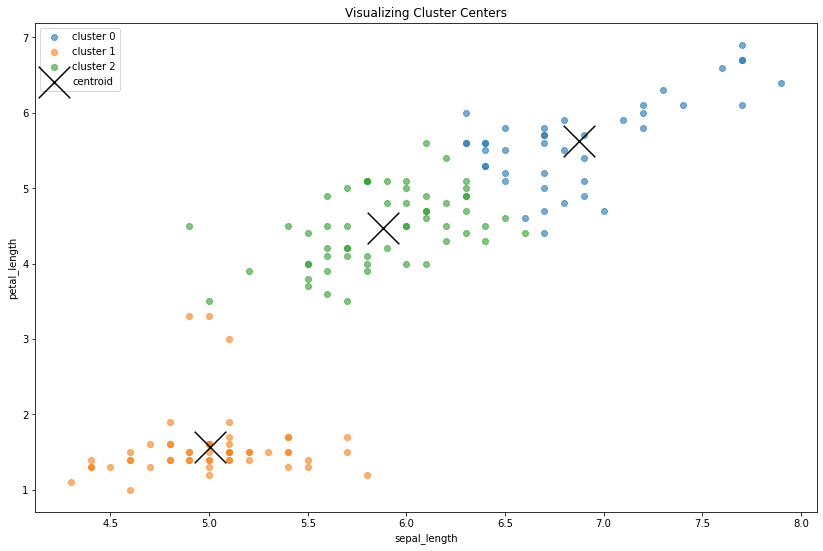

In [19]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

---
> ## Mini Exercise:

> #### What if we chose a different number of clusters?

> Take ten minutes to look through the documentation for K-Means Clustering on Sci-Kit Learn.

> Change the number k of clusters, and then one other hyperparameter. Record your takeaways.
---

In [20]:
#scaler2 = MinMaxScaler().fit(X)
#X_scaled2 = pd.DataFrame(scaler2.transform(X), columns= X.columns).set_index([X.index.values])

In [21]:
# sklearn implementation of KMeans

#define the thing
#kmeans = KMeans(n_clusters=4, random_state=321)

# fit the thing
#kmeans.fit(X_scaled2)

# Use (predict using) the thing 
#kmeans.predict(X_scaled2)

In [22]:
#iris['cluster'] = kmeans.predict(X_scaled2)

#X_scaled2['cluster'] = kmeans.predict(X_scaled2)

In [23]:
#iris.sample(15)

---

> #### How do we determine which K to use?

---

## How to choose 'k'

#### The human element: Domain knowledge, intuition and prior knowledge
 - Do you have an understanding for how many markets might exist?
 - Do you have knowledge of some grouping that isnt referenced in your existing features?
 - Did you observe specific observable clusters in your exploratory data analysis?

#### The computational element: Elbow Method
 - Try different k values and evaluate results
 - Inertia is a term that describes the sum of squared distances from each point to it's assigned centroid  
 - Inertia asymptotically approaches zero as we increase k.
 - We can observe a point where the interia begins to reduce less significantly, "the elbow"

In [24]:
# We can observe interia as a baked in property of our kmeans object
kmeans.inertia_

2.7292451122979946

In [25]:
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

5.3260673221799

In [26]:
# intertia with k = 3
k =3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

2.7292451122979946

In [27]:
# interia with k = 4

k =4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

1.78773127723591

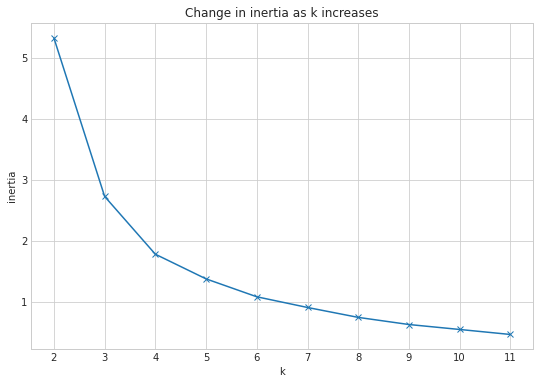

In [28]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

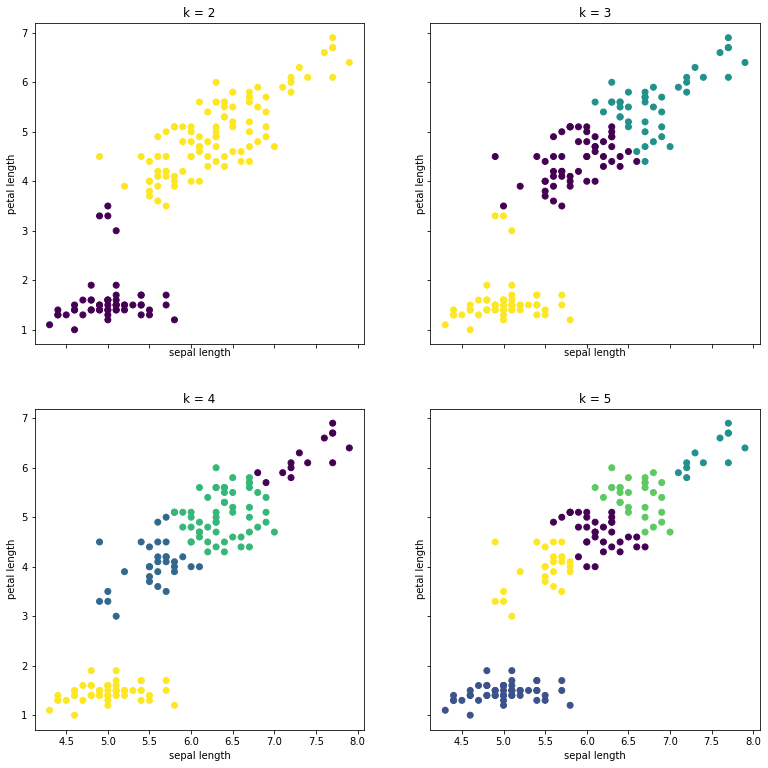

In [29]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

## Mall data

In [30]:
import env

def get_connection(db, user=env.username, host=env.hostname, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

In [37]:
mall = get_mallcustomer_data()

In [38]:
mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [39]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [40]:
mall['is_male'] = pd.get_dummies(mall['gender'], drop_first=True)['Male']
mall.drop(columns=['gender'], inplace=True)
mall.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [41]:
train_validate, test = train_test_split(mall, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  448
validate observations:  192
test observations:  160


In [42]:
train.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
131,47,71,9,1
63,67,47,52,0
14,24,20,77,0
174,36,87,92,1
145,25,77,12,1


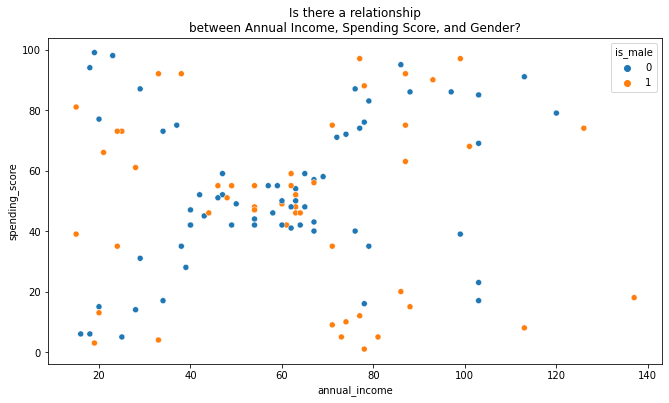

In [43]:
f, ax = plt.subplots(figsize=(11, 6))
sns.scatterplot(
    x='annual_income',
    y='spending_score',
    data=train,
    hue='is_male',
    palette='tab10',
)
plt.title("Is there a relationship\nbetween Annual Income, Spending Score, and Gender?")
plt.show()

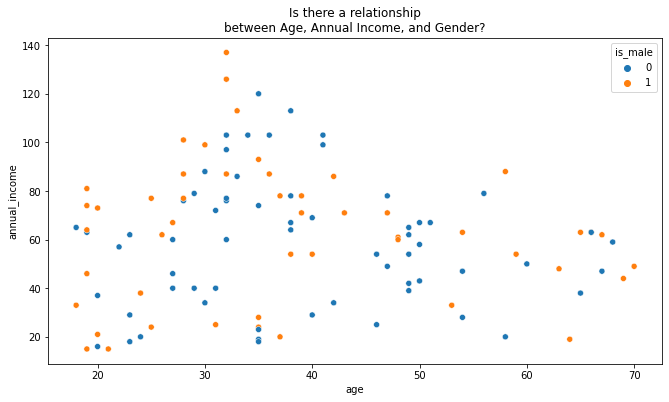

In [45]:
f, ax = plt.subplots(figsize=(11, 6))
sns.scatterplot(
    x='age',
    y='annual_income',
    data=train,
    hue='is_male',
    palette='tab10',
)
plt.title("Is there a relationship\nbetween Age, Annual Income, and Gender?")
plt.show()

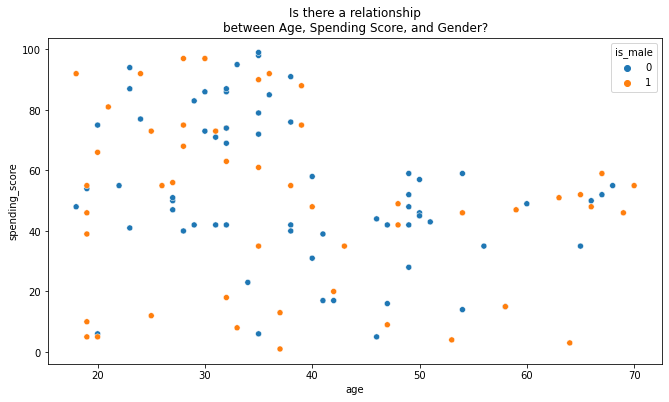

In [46]:
f, ax = plt.subplots(figsize=(11, 6))
sns.scatterplot(
    x='age',
    y='spending_score',
    data=train,
    hue='is_male',
    palette='tab10',
)
plt.title("Is there a relationship\nbetween Age, Spending Score, and Gender?")
plt.show()

### Cluster Modeling

In [48]:
train.head(3)

,age,annual_income,spending_score,is_male
customer_id,,,,
131,47,71,9,1
63,67,47,52,0
14,24,20,77,0


In [82]:
X = train[['annual_income', 'spending_score']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

array([2, 0, 3, 4, 2, 3, 3, 4, 0, 4, 0, 0, 0, 2, 2, 0, 3, 0, 0, 2, 0, 0,
       0, 4, 0, 4, 2, 0, 1, 0, 0, 1, 4, 1, 0, 2, 1, 0, 2, 1, 1, 1, 4, 3,
       4, 3, 0, 0, 4, 0, 2, 3, 4, 0, 0, 0, 0, 1, 1, 0, 4, 3, 4, 2, 4, 2,
       0, 2, 4, 0, 3, 4, 1, 0, 0, 3, 1, 0, 0, 2, 3, 0, 4, 3, 0, 1, 0, 3,
       2, 0, 0, 1, 0, 0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 0, 2, 0, 4, 1, 3, 0,
       0, 4], dtype=int32)

In [83]:
train['cluster'] = kmeans.predict(X)
train.head(3)

,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,
131,47,71,9,1,2
63,67,47,52,0,0
14,24,20,77,0,3


In [84]:
centroid = train.groupby('cluster').mean()
centroid

,age,annual_income,spending_score,is_male
cluster,,,,
0,44.021739,56.978261,48.695652,0.369565
1,44.071429,25.571429,17.928571,0.357143
2,36.733333,89.333333,15.533333,0.666667
3,26.000000,26.000000,81.500000,0.500000
4,33.043478,90.086957,81.434783,0.434783


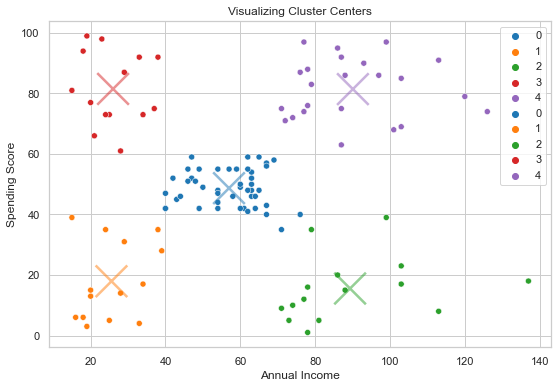

In [88]:
#Plot of clusters with centroids
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x="annual_income", y="spending_score",
                hue="cluster", 
                palette="tab10",
                data=train, ax=ax)

sns.scatterplot(x="annual_income", y="spending_score",
                hue="cluster", 
                palette="tab10", marker='x', s=1000,
                data=centroid, ax=ax, alpha=.5)

plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Visualizing Cluster Centers')
plt.show()

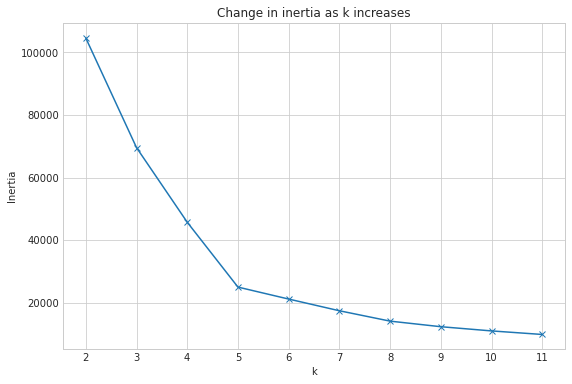

In [78]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Change in inertia as k increases')

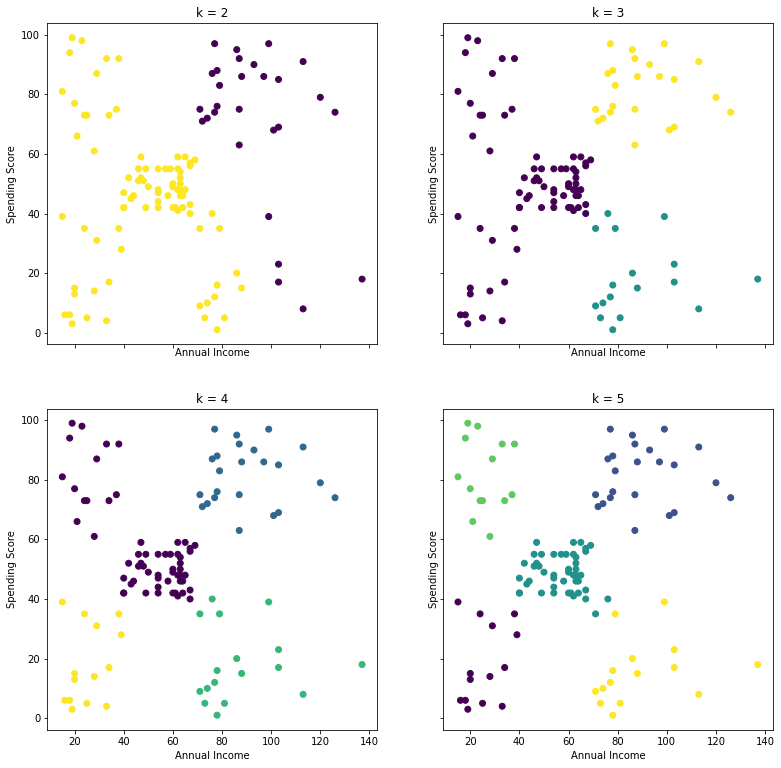

In [81]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='Annual Income', ylabel='Spending Score')